In [2]:
#Load and resample data

In [3]:
import sys
import os
sys.path.append(os.path.abspath('../src'))

In [4]:
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [5]:
from preprocessing import load_and_resample_data, split_and_scale
from models import get_models, evaluate_model, cross_validate_model
from visualization import plot_roc_curves, shap_summary_plot
import joblib

In [6]:
X_resampled, y_resampled = load_and_resample_data('../data/creditcard.csv')
X_train, X_test, y_train, y_test, X_train_scaled, X_test_scaled = split_and_scale(X_resampled, y_resampled)

In [7]:
#Train and evaluate all models

In [8]:
models = get_models()
results = []

for name, model in models.items():
    if name == "Logistic Regression":
        res = evaluate_model(name, model, X_train_scaled, X_test_scaled, y_train, y_test)
    else:
        res = evaluate_model(name, model, X_train, X_test, y_train, y_test)
    results.append(res)

--- Logistic Regression ---
Precision: 0.9907
Recall:    0.9702
F1-score:  0.9803
ROC-AUC:   0.9974
Confusion Matrix:
[[56343   520]
 [ 1692 55171]]

--- Random Forest ---
Precision: 0.9997
Recall:    1.0000
F1-score:  0.9998
ROC-AUC:   1.0000
Confusion Matrix:
[[56846    17]
 [    1 56862]]

--- XGBoost ---
Precision: 0.9996
Recall:    1.0000
F1-score:  0.9998
ROC-AUC:   1.0000
Confusion Matrix:
[[56841    22]
 [    0 56863]]

[LightGBM] [Info] Number of positive: 227452, number of negative: 227452
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.053339 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 454904, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
--- LightGBM ---
Precision: 0.9989
Recall:    0.9999
F1-score:  0.9994
ROC-AUC:   0.9999
Confusion Matrix:
[[56803    60]
 [  

In [9]:
#Cross-validation

In [10]:
mean_auc, std_auc = cross_validate_model(models["Logistic Regression"], X_resampled, y_resampled)
print(f"Logistic Regression CV ROC-AUC: {mean_auc:.4f} ± {std_auc:.4f}")

Logistic Regression CV ROC-AUC: 0.9973 ± 0.0001


In [11]:
#SHAP interpretation (on XGBoost)

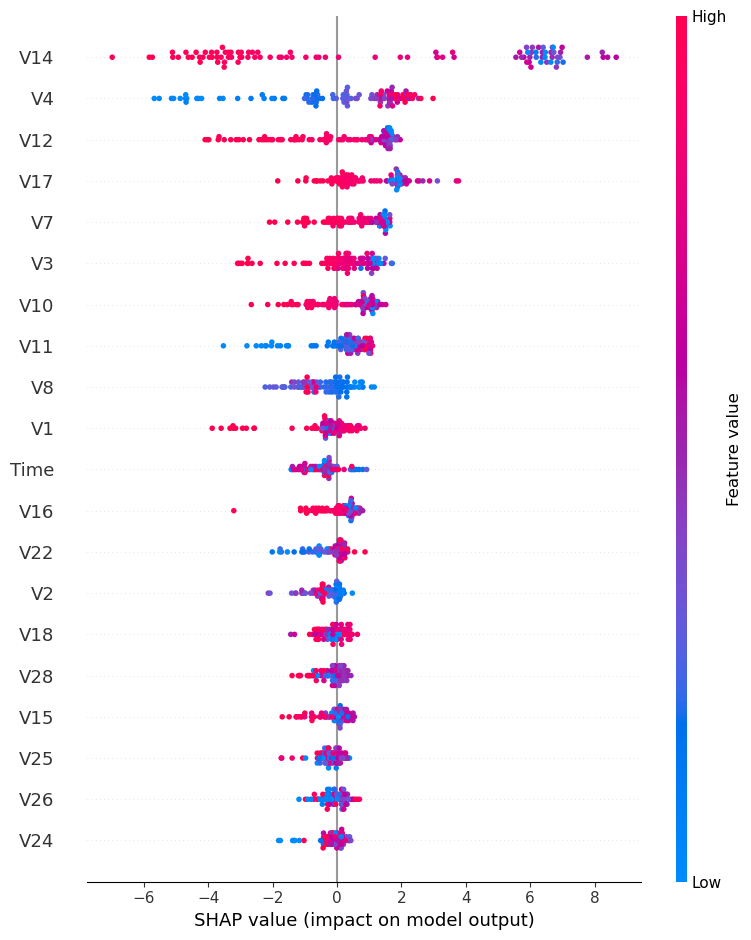

In [12]:
xgb_model = models['XGBoost']
xgb_model.fit(X_train, y_train)
shap_summary_plot(xgb_model, X_test)

In [13]:
#ROC Curve Visualization

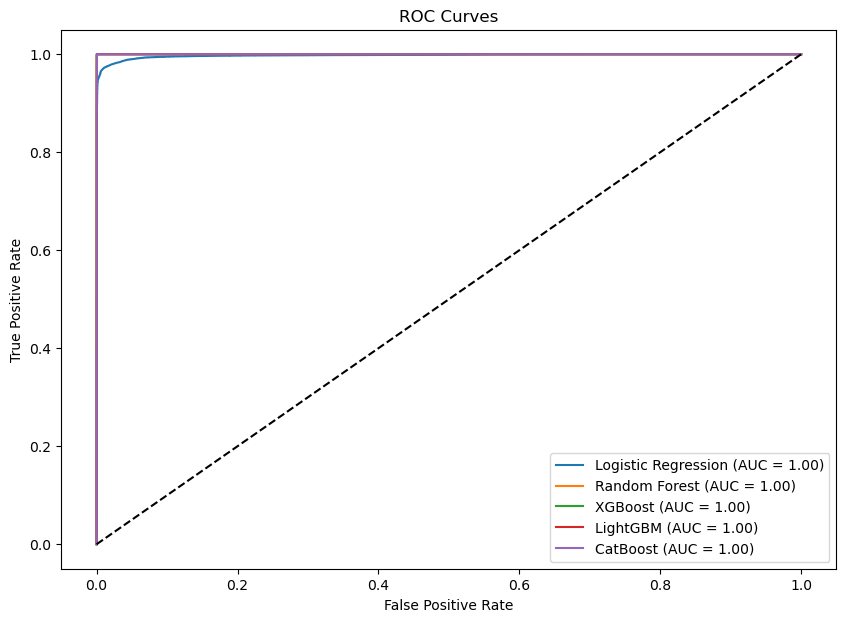

In [14]:
plot_roc_curves(models, X_test_scaled, X_test, y_test)

In [15]:
#Save the best model

In [16]:
joblib.dump(xgb_model, '../models/xgb_creditcard_model.joblib')
print("Model saved successfully.")

Model saved successfully.
